### Homework
1. Do clustering on the digits dataset from sklearn using at least three different approaches
2. Evaluate the quality of clustering using three metrics from the lecture
3. Apply dimensionality reduction, then do clustering and calculate metrics.
4. Make a comparison table of different clustering approaches with and without dimensionality reduction.

In this task, we want to use 10 clusters, as we have 10 digits.

In [43]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

In [3]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn import datasets
from sklearn.cluster import KMeans

digits = datasets.load_digits()
train_data = digits.data
train_labels = digits.target
model_kmeans = KMeans(n_clusters=10)
model_kmeans.fit(train_data)
y_pred = model_kmeans.labels_
print(f"KMean silhouette_score: {silhouette_score(train_data, y_pred)}")
print(f"KMean adjusted_rand_score: {adjusted_rand_score(train_labels, y_pred)}")
print(f"KMean adjusted_mutual_info_score: {adjusted_mutual_info_score(train_labels, y_pred)}")

KMean silhouette_score: 0.18804562867060545
KMean adjusted_rand_score: 0.5953567235861394
KMean adjusted_mutual_info_score: 0.7253260702853757


In [2]:
digits = datasets.load_digits()

print(digits.data.shape)
print(digits.DESCR)
digits['data']

(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This gene

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 640x480 with 0 Axes>

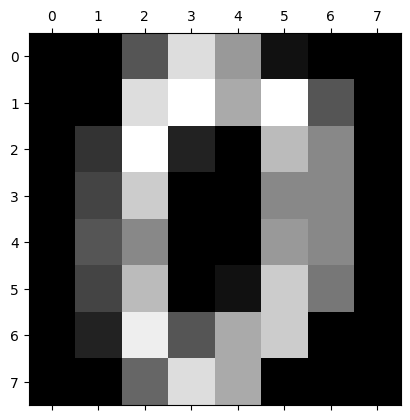

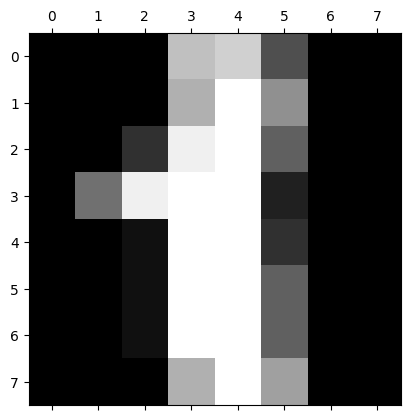

In [4]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])
plt.show()

In [44]:
def get_data():
    digits = datasets.load_digits()
    scaler = StandardScaler()
    X = scaler.fit_transform(digits.data)
    y = digits.target
    
    return X, y
    
    
def create_label_to_digit_map(labels, target):
    dl_pairs = []

    for i in range(10):            
        label_bins = np.bincount(labels[target == i])
        digit_cnt = (target == i).sum()
        print(f'digit: {i}: {label_bins}, {digit_cnt}')
        
        for l, l_cnt in enumerate(label_bins):
            dl_pairs.append((i, l, 100*(1 - np.abs(l_cnt - digit_cnt)/digit_cnt)))

    dl_pairs = pd.DataFrame(dl_pairs, columns=['digit', 'label', 'confidence']).sort_values('confidence', ascending=False)
    ld_map = np.repeat(-1, 10)
    dl_map = np.repeat(-1, 10)
    confidence = np.repeat(0, 10)
    i = 0
    for _, row in dl_pairs.iterrows():
        d, l, c = int(row['digit']), int(row['label']), float(row['confidence'])
        if ld_map[l] < 0:
            ld_map[l] = d
            dl_map[d] = l
            confidence[d] = c
            i += 1
            if i == 10:
                break
    
    print('Label to digit map:', ld_map)
    print('Digit recognition confidence:')
    for i in range(10):
        print(f'{i} -> {dl_map[i]}: {confidence[i]}%')
    
    return ld_map


def map_label_to_digit(labels, target):
    ld_map = create_label_to_digit_map(labels, target)
    return ld_map[labels]
    
X, target = get_data()
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
target_predicted = map_label_to_digit(kmeans.labels_, target)
target_predicted


digit: 0: [  0   0 177   0   1], 178
digit: 1: [  1   0   0   0 147   6   0  27   0   1], 182
digit: 2: [113   0   0   0  14   6   2  42], 177
digit: 3: [  8   0   0   0   7 155   7   1   0   5], 183
digit: 4: [  0   9   0   0   3   0   6   0 161   2], 181
digit: 5: [  0   0   0   3   1  40   0   0   2 136], 182
digit: 6: [  0   0   1 172   7   0   0   1], 181
digit: 7: [  5  18   0   0   0   0 155   0   0   1], 179
digit: 8: [  7   0   0   1 102  50   2   0   0  12], 174
digit: 9: [  0   5   0   0  10 145  14   0   2   4], 180
Label to digit map: [2 7 0 6 1 3 7 2 4 5]
Digit recognition confidence:
0 -> 2: 99%
1 -> 4: 80%
2 -> 7: 23%
3 -> 5: 84%
4 -> 8: 88%
5 -> 9: 74%
6 -> 3: 95%
7 -> 1: 10%
8 -> -1: 0%
9 -> -1: 0%


array([0, 1, 1, ..., 1, 3, 3])

In [45]:
print("KMeans")
print(f"adjusted_mutual_info_score: {adjusted_mutual_info_score(target, target_predicted)}")
print(f"adjusted_rand_score: {adjusted_rand_score(target, target_predicted)}")
print(f"silhouette_score: {silhouette_score(target, target_predicted)}")

KMeans
adjusted_mutual_info_score: 0.7007879808469545
adjusted_rand_score: 0.5750839028400782


ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2 ... 8 9 8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

array([2., 7., 0., 6., 1., 3., 7., 2., 4., 5.])

In [38]:
np.bincount(kmeans.labels_[target == 0])

array([  0,   0, 177,   0,   1], dtype=int64)

In [ ]:
# train k-means on the digits dataset
# calculate metrics for the k-means model: silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
# save the metrics
# do the same for other two clustering algorithms of your choice

In [ ]:
# apply PCA to the dataset
# train the same clustering algorithms on the PCA-transformed dataset
# calculate the same metrics for the PCA-transformed dataset
# save the metrics
# do the same with TSNE and UMAP transformations

In [ ]:
# compare the metrics for the original dataset and the transformed datasets
# make a conclusion about the quality of the clustering algorithms and the transformations

In [ ]:
# what metrics are the most informative in this case?
# what metrics should be used to compare the quality of the clustering algorithms and the transformations in real-life, when the true labels are unknown?
# provide an example of a real-life task and explain the validation strategy and metrics for it 